# EDA with Numerical Data

* <b>PassengerID</b>: random ID assigned to passenger
* <b>Pclass</b>: Ticket class of passenger (i.e, 1st class, 2nd class, and 3rd class)
* <b>Name</b>: Name of the passenger
* <b>Sex</b>: Male or Female
* <b>Age</b>: Age of passenger
* <b>SibSp</b>: Number of siblings accompanying passenger
* <b>Parch</b>: Number of parents and children accompanying passenger
* <b>Ticket</b>: Ticket number of passenger
* <b>Fare</b>: Fare paid for ticket
* <b>Cabin</b>: Cabin number of passenger
* <b>Embarked</b>: Port from which passenger embarked
* <b>Survived</b>: 0 and 1 for died and survived, respectively

In [61]:
# Import the libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allow embedding plots in Jupyter (magic function)
%matplotlib inline


In [62]:
# Import the data as Pandas DataFrame
titanicDf = pd.read_csv('./titanic.csv')

In [63]:
# Preview the 'head' of the DataFrame
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
# Look at summary info for the data
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
# Make a list of categorical and irrelevant features to remove
categoricalFeats = ['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin', 'PassengerId']

# Drop unwanted features
# Note:
# axis is for indicating rows (0) or columns (1)
# inPlace whether or not to modify the original DataFrame
titanicDf.drop(categoricalFeats, axis=1, inplace=True)

In [66]:
# Check changes after dropping
titanicDf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [67]:
# Show summary statistics for the DataFrame
titanicDf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Calculating Measures of Dispesion (Mean, Variance, and Standard Deviation)

In [68]:
# Get a subset of titanicDf where age is 0 or greater
searchCondition = titanicDf['Age'] >= 0
subsetDf = titanicDf[ searchCondition ]
# From the subset df, extract values in 'Age' column
subsetDf['Age'].values

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

In [69]:
import math
# 1 - Calculating Mean Average
ageOfPeople = subsetDf['Age'].values
X = ageOfPeople

numerator = 0
for x_i in X:
    numerator += x_i

denominator = len(X)

mu = numerator/denominator
print(mu)

# 2 - Calculate the Variance
numerator = 0
for x_i in X:
    numerator += pow(x_i - mu, 2)
denominator = len(X)
variance = numerator/(denominator-1)
print(variance)

# 3 - Calculate the Standard Deviation
standardDeviation = math.sqrt(variance)
print(standardDeviation)


29.69911764705882
211.0191247463081
14.526497332334044


In [71]:
# Breakown of survived vs non-survived
titanicDf.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [77]:
# Group DataFrame by age vs no age
groupCondition = titanicDf['Age'].isnull()
titanicDf.groupby( groupCondition ).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


<Figure size 432x288 with 0 Axes>

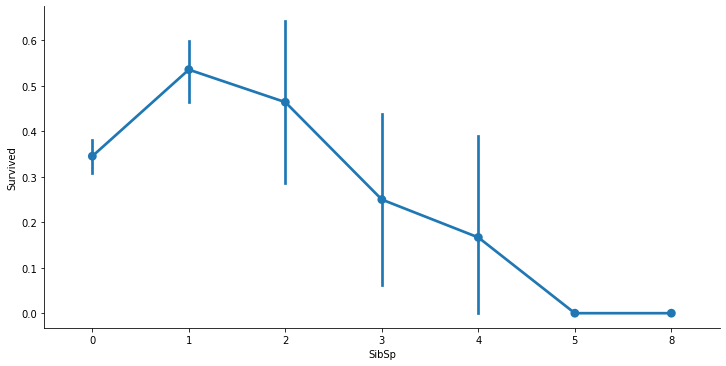

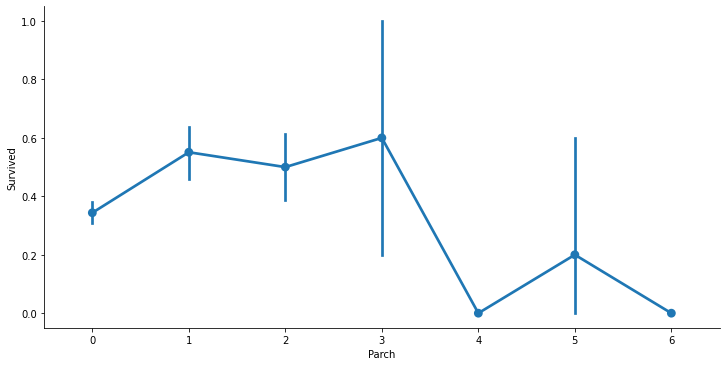

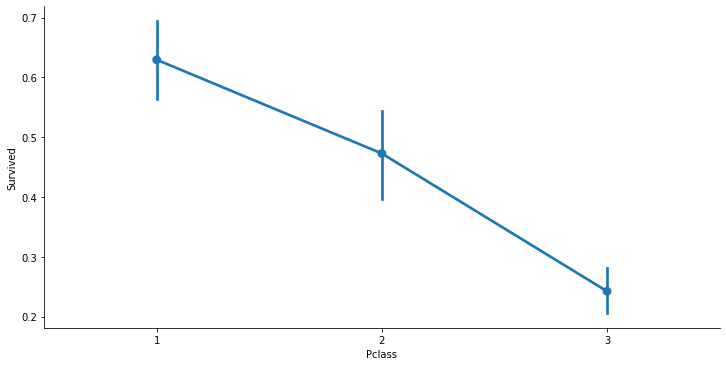

In [78]:
explanatoryFeats = ['SibSp','Parch','Pclass']

for index, feat in enumerate(explanatoryFeats):

    # Embed plots inside notebook
    plt.figure(index)

    # Add graph on top of plot
    sns.catplot(x=feat, y='Survived', data=titanicDf, kind='point', aspect=2) 

In [87]:
titanicDf.groupby('Pclass').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [86]:
titanicDf.groupby('Pclass').describe()['Parch']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.356481,0.693997,0.0,0.0,0.0,0.0,4.0
2,184.0,0.380435,0.690963,0.0,0.0,0.0,1.0,3.0
3,491.0,0.393075,0.888861,0.0,0.0,0.0,0.0,6.0


In [88]:
titanicDf.groupby('Pclass').describe()['SibSp']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.416667,0.611898,0.0,0.0,0.0,1.0,3.0
2,184.0,0.402174,0.601633,0.0,0.0,0.0,1.0,3.0
3,491.0,0.615071,1.374883,0.0,0.0,0.0,1.0,8.0


In [89]:
titanicDf.groupby('Pclass').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0
